# Stock market price prediction using Random Forest Regression Algorithm 

## Step 1:- Data Collection

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Loading Dataset

In [3]:
stock= pd.read_csv(r"TATAMOTORS.NS.csv")# here we storing dataset in stock named variable 

In [4]:
stock.head() #this data set has 7 features 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,147.927109,4822862.0
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,149.815109,3963218.0


In [5]:
stock.shape # the original dataset has 4233 rows and 7 columns

(4233, 7)

In [6]:
stock.info() # Now we can see that Date column is object it means sting 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233 entries, 0 to 4232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4233 non-null   object 
 1   Open       4226 non-null   float64
 2   High       4226 non-null   float64
 3   Low        4226 non-null   float64
 4   Close      4226 non-null   float64
 5   Adj Close  4226 non-null   float64
 6   Volume     4226 non-null   float64
dtypes: float64(6), object(1)
memory usage: 231.6+ KB


In [7]:
stock.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
4230,2024-01-17,811.000000,813.700012,804.0,805.549988,805.549988,7895439.0
4231,2024-01-18,807.000000,822.950012,797.0,819.049988,819.049988,11500495.0
4232,2024-01-19,823.849976,826.000000,819.5,823.549988,823.549988,5706888.0


## Step 2:- Exploratory Data Analysis 

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '2020-01-10'),
  Text(0.0, 0, '2006-12-01'),
  Text(1000.0, 0, '2010-12-22'),
  Text(2000.0, 0, '2015-01-07'),
  Text(3000.0, 0, '2019-01-24'),
  Text(4000.0, 0, '2023-02-09'),
  Text(5000.0, 0, '')])

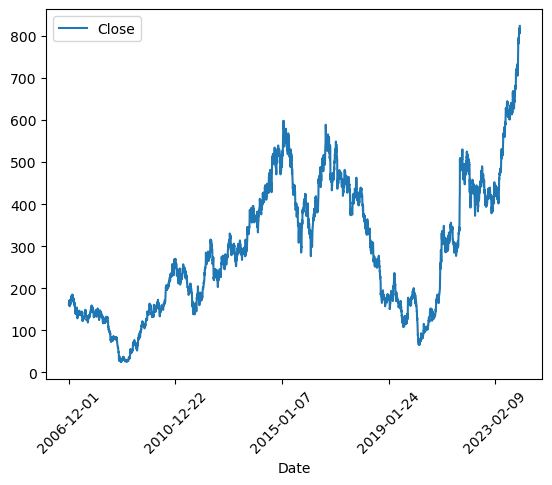

In [8]:
stock.plot(x="Date", y="Close")# this plot shows the closing price of 2000 to 2020 year
plt.xticks(rotation=45)

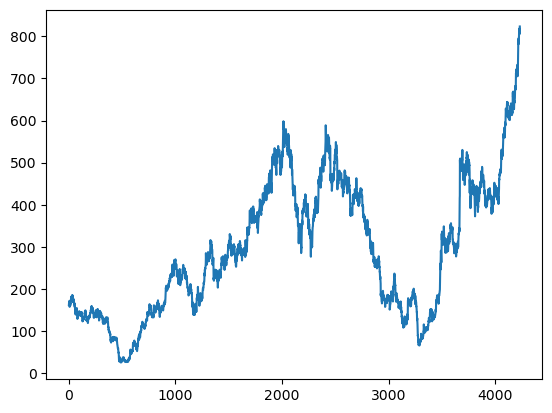

In [9]:
plt.plot(stock['Close'])

<Axes: xlabel='Date'>

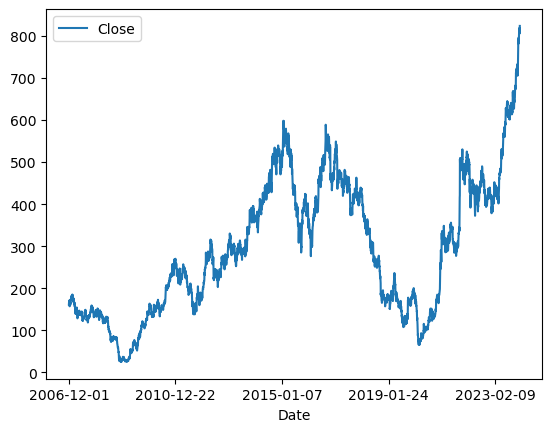

In [10]:
stock.plot(x="Date", y="Close")# this plot shows the closing price of 2000 to 2020 year

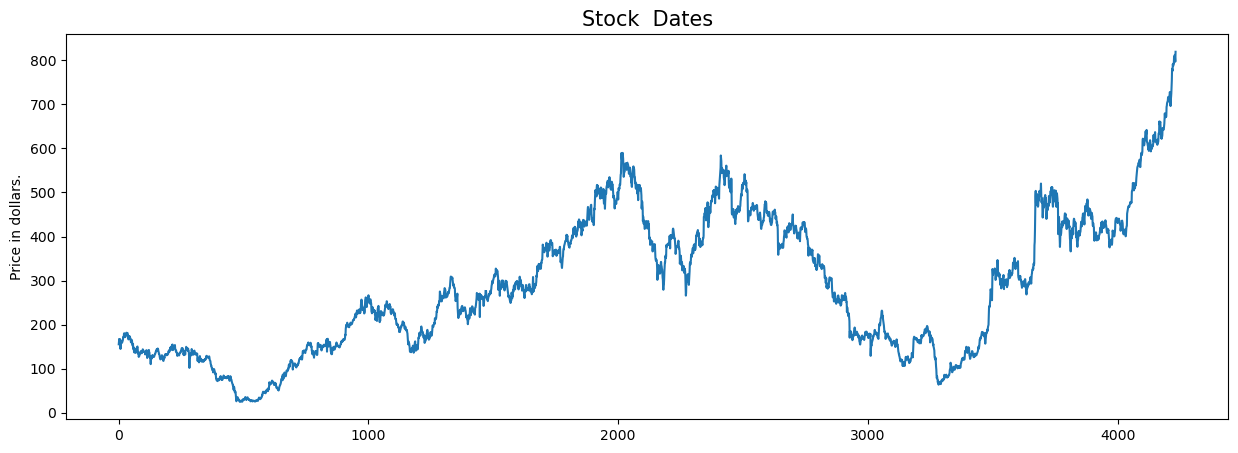

In [11]:
plt.figure(figsize=(15,5))
plt.plot(stock['Low'])
plt.title('Stock  Dates', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

## Step 3:- Data preprocessing

### :- Data Cleaning & Headling with missing values

In [12]:
stock.isnull().sum().sum()#On this dataset has total 42 missing values have

42

In [14]:
stock['Volume'].max() # I volume max value is 390577839.0,so we fill the nan value 

390577839.0

In [15]:
stock['Volume'].replace(np.nan,390577839.0,inplace=True)

In [16]:
stock['Volume'].isnull().sum()# Now volume column is 0 missing value

0

In [17]:
stock.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0


In [18]:
stock.dropna(inplace=True)

In [19]:
stock = stock.dropna()

* ***Now all the null values are droped now this Data set as 0 nan values***

## Step 4:- Data Integration and Reduction

In [20]:
x = stock.drop(columns=['Date', 'Open'])  # Assuming 'Date' is not a feature and 'Open' is the target variable
y = stock['Open']

In [21]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,147.927109,4822862.0
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,149.815109,3963218.0


## step 6:- Data Splitting

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape

(3380, 5)

## Step 5:-Feature Scaling

In [24]:
MS=MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array=MS.fit_transform(x_train)

In [26]:
data_training_array

array([[0.41545305, 0.40311382, 0.40188542, 0.40192044, 0.0271194 ],
       [0.49137586, 0.49307695, 0.49516294, 0.49239597, 0.00972565],
       [0.30759333, 0.29771251, 0.30836786, 0.29931167, 0.04739484],
       ...,
       [0.16832244, 0.16776143, 0.16963911, 0.17117327, 0.04230558],
       [0.52546926, 0.52034572, 0.51690502, 0.51645917, 0.08058766],
       [0.15898582, 0.15845178, 0.15984268, 0.14926246, 0.05594969]])

## Step 7:- Model Training 

In [27]:
rf= RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

## Step 8:- Model Evaluation

In [29]:
predictions = rf.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 14.325518609487622


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("r2 Score:", r2)

r2 Score: 0.9994289219415903


In [32]:
# Predicting the next day's opening price (assuming last row of dataset)
next_day_features = x.iloc[[-1]]  # Assuming the last row contains the latest features
next_day_opening_price = rf.predict(next_day_features)
print("Predicted next day's opening price:", next_day_opening_price)

Predicted next day's opening price: [816.74351176]
